In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [12,10],dpi =100, facecolor='white')

c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\mueller lab\appdata\local\program

scanpy==1.9.5 anndata==0.8.0 umap==0.5.2 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.0 pynndescent==0.5.5


In [2]:
adata = sc.read_h5ad('AP_KO_BRN12.h5ad')
adata = adata[adata.obs['Batch']!=1,:]
adata.var_names_make_unique()

adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

adata.obs['Batch'] = adata.obs['Batch'].astype('category')
adata.obs['age.x'] = adata.obs['age.x'].astype('category')

adata.obs['pseudotime'] = pd.read_csv('KO_pseudotime_similarity.csv')['pseudotime'].to_list()

c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [6]:
genes = ['Hmga2','Cdon','Nes','Top2a','Wnt5a','Tesc','Foxo1','Insm1','Zbtb20','Dck','Mki67','Kif11','Ccnd2','Ezh2','Neurog2',
        'Notch1','Notch2','Dll1','Hes1','Cdk6','Cdk5rap2','Knl1','Aspm','Cenpj','Stil','Cep135','Sass6','Mfsd2a','Cit','Copb2']

In [8]:
df_p = pd.DataFrame(adata[:,genes].X.todense(),columns = genes)
df_p['pseudotime'] = adata.obs['pseudotime'].values
df_p['age'] = adata.obs['age.x'].values

In [10]:
from scipy.interpolate import UnivariateSpline

In [11]:
import seaborn as sns
sns.set_style("whitegrid",{'axis.grid' : False})

In [12]:
import matplotlib.backends.backend_pdf

In [12]:
df_p = df_p.sort_values(by = 'pseudotime')

Text(0.5, 1.0, 'Nes')

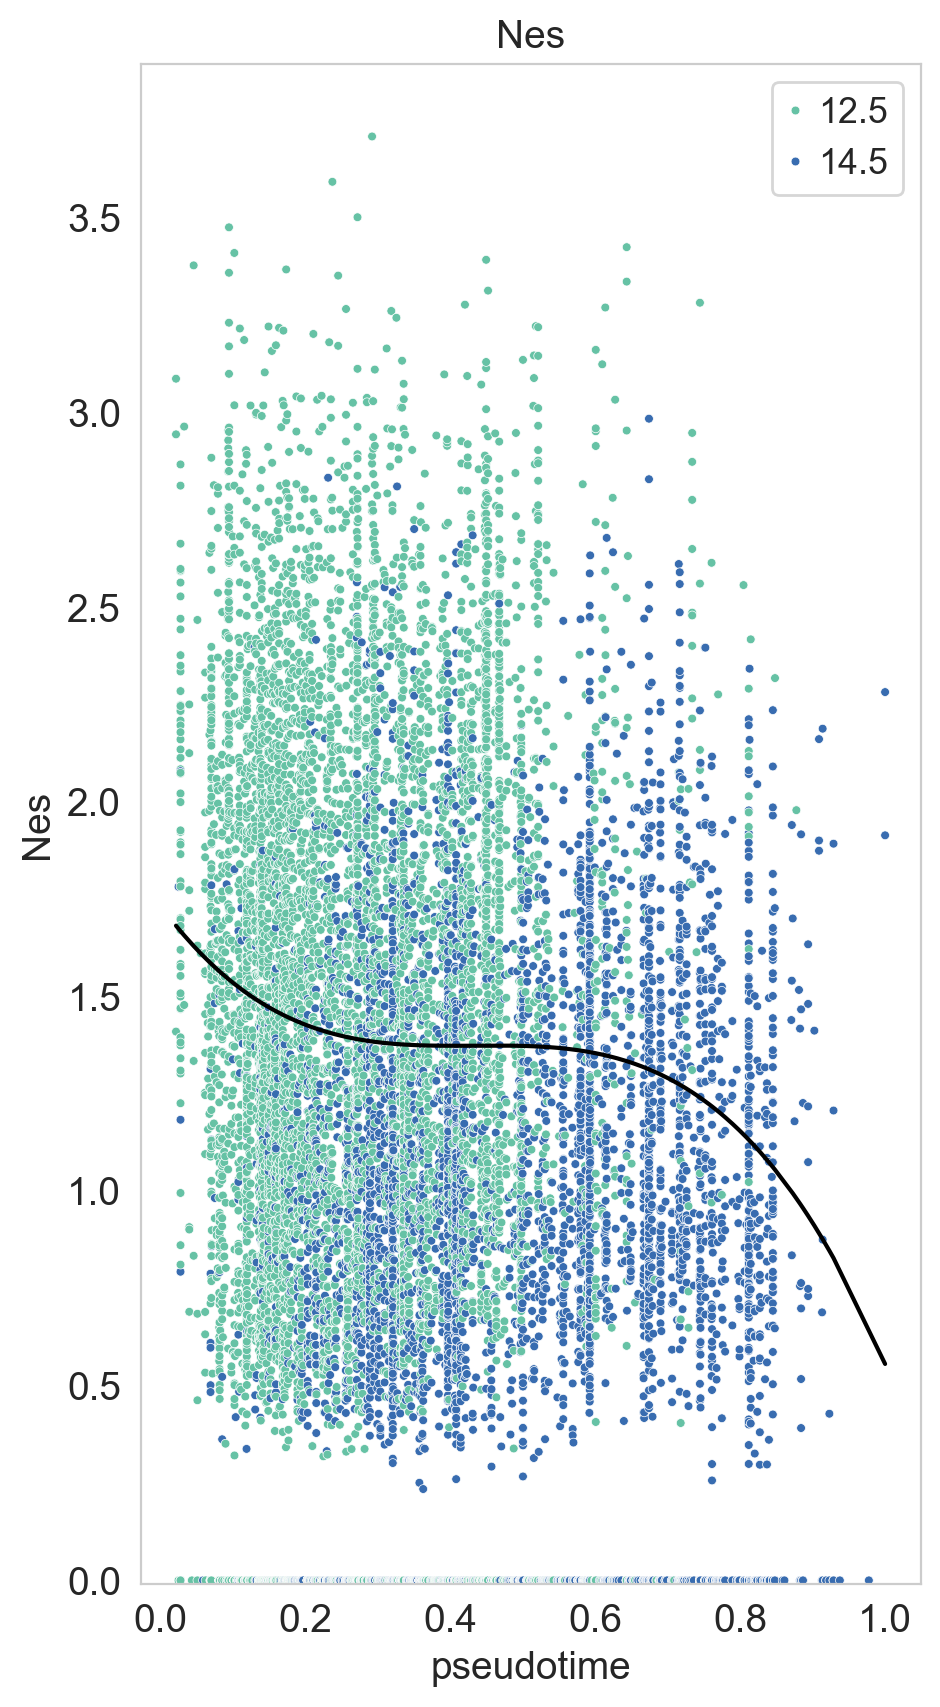

In [15]:
d_new = df_p[['pseudotime','Nes']][df_p['Nes'] > 0]
spl = UnivariateSpline(d_new['pseudotime'], d_new['Nes'],k=3)
fit = spl(d_new['pseudotime'])
d_new['fit'] = np.ravel(fit)
figure = plt.figure(figsize = (5,10))
sns.scatterplot(data = df_p,x = 'pseudotime',y = 'Nes',hue = 'age',s = 10,palette = ['#66C2A5','#386CB0'])
sns.lineplot(data = d_new,x = 'pseudotime',y='fit',color = 'black')
plt.grid(None)
plt.ylim(bottom = -0.01)
plt.title('Nes')

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("genes_scatter_ko.pdf")

for i in genes:
    d_new = df_p[['pseudotime',i]][df_p[i] > 0]
    spl = UnivariateSpline(d_new['pseudotime'], d_new[i],k=3)
    fit = spl(d_new['pseudotime'])
    d_new['fit'] = np.ravel(fit)
    figure = plt.figure(figsize = (5,10))
    sns.scatterplot(data = df_p,x = 'pseudotime',y = i,hue = 'age',s = 10,palette = ['#66C2A5','#386CB0'])
    sns.lineplot(data = d_new,x = 'pseudotime',y='fit',color = 'black')
    plt.grid(None)
    plt.ylim(bottom = -0.01)
    plt.title(i)
    pdf.savefig(figure)
    
pdf.close()

In [3]:
adata = sc.read_h5ad('AP_CONTROL_BRN12.h5ad')
adata = adata[adata.obs['Batch']!=1,:]
adata.var_names_make_unique()

adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

adata.obs['Batch'] = adata.obs['Batch'].astype('category')
adata.obs['age.x'] = adata.obs['age.x'].astype('category')

adata.obs['pseudotime'] = pd.read_csv('ct_pseudotime.csv')['pseudotime'].to_list()

c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [7]:
df_p = pd.DataFrame(adata[:,genes].X.todense(),columns = genes)
df_p['pseudotime'] = adata.obs['pseudotime'].values
df_p['age'] = adata.obs['age.x'].values

In [8]:
df_p = df_p.sort_values(by = 'pseudotime')

Text(0.5, 1.0, 'Nes')

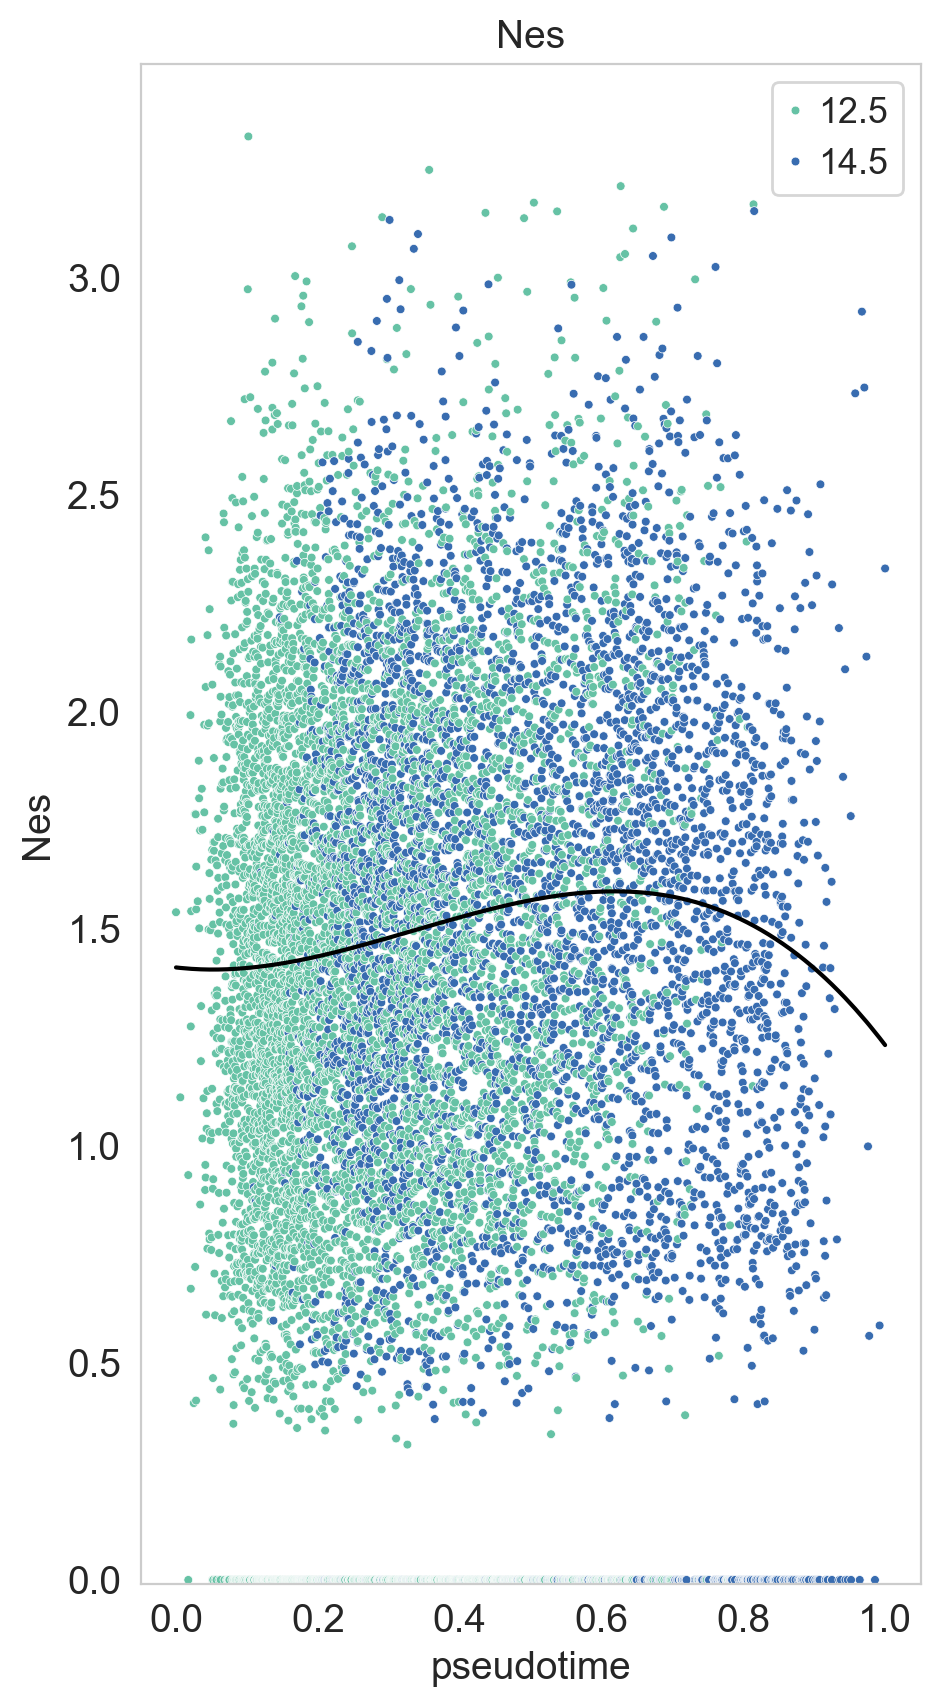

In [13]:
d_new = df_p[['pseudotime','Nes']][df_p['Nes'] > 0]
spl = UnivariateSpline(d_new['pseudotime'], d_new['Nes'],k=3)
fit = spl(d_new['pseudotime'])
d_new['fit'] = np.ravel(fit)
figure = plt.figure(figsize = (5,10))
sns.scatterplot(data = df_p,x = 'pseudotime',y = 'Nes',hue = 'age',s = 10,palette = ['#66C2A5','#386CB0'])
sns.lineplot(data = d_new,x = 'pseudotime',y='fit',color = 'black')
plt.grid(None)
plt.ylim(bottom = -0.01)
plt.title('Nes')

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("genes_scatter_ct.pdf")

for i in genes:
    d_new = df_p[['pseudotime',i]][df_p[i] > 0]
    spl = UnivariateSpline(d_new['pseudotime'], d_new[i],k=3)
    fit = spl(d_new['pseudotime'])
    d_new['fit'] = np.ravel(fit)
    figure = plt.figure(figsize = (5,10))
    sns.scatterplot(data = df_p,x = 'pseudotime',y = i,hue = 'age',s = 10,palette = ['#66C2A5','#386CB0'])
    sns.lineplot(data = d_new,x = 'pseudotime',y='fit',color = 'black')
    plt.grid(None)
    plt.ylim(bottom = -0.01)
    plt.title(i)
    pdf.savefig(figure)
    
pdf.close()